<a href="https://colab.research.google.com/github/Madhuvod/data-analytics-projects/blob/main/zomato_dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataframe = pd.read_csv("zomatodata.csv")
print(dataframe.head())


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

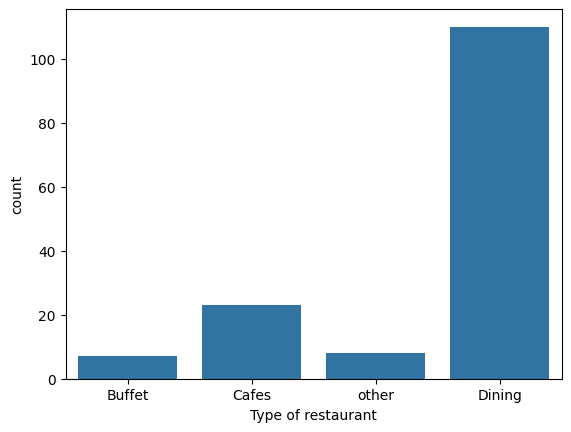

In [ ]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")


the majority of the restaurants fall into the dining categoryy


Text(0, 0.5, 'Votes')

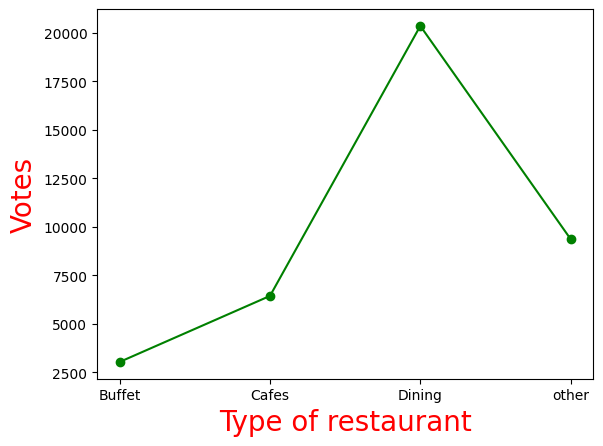

In [ ]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)


Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.

In [ ]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


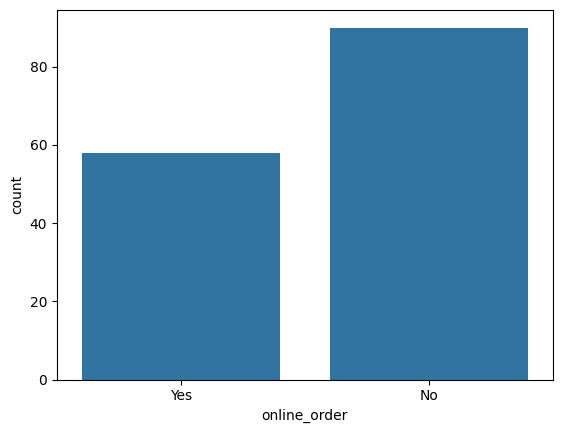

In [ ]:
sns.countplot(x=dataframe['online_order'])
plt.show()

this just tells us that the majority of the restaurants on zomato refer a offline orders instead of online orders


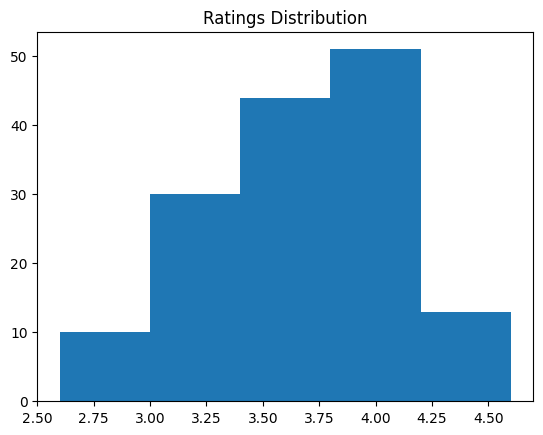

In [ ]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

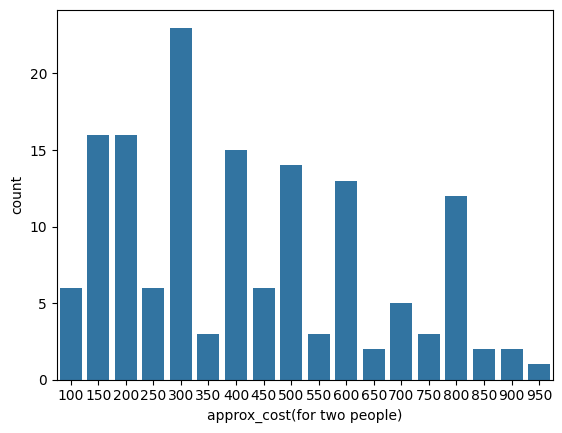

In [ ]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

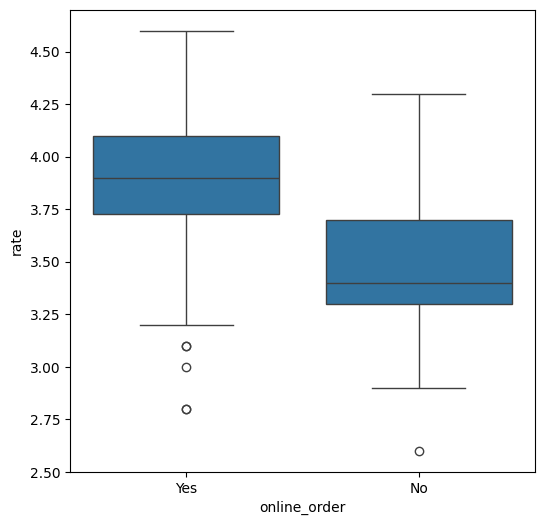

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)


**Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.**

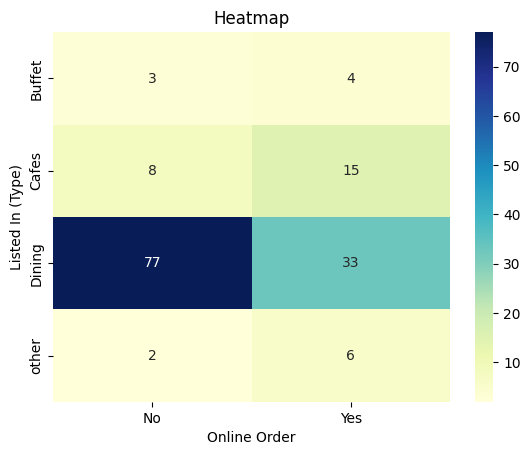

In [ ]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


this just tells us that cafes recieve more offline orders and restaurants recieve more online orders


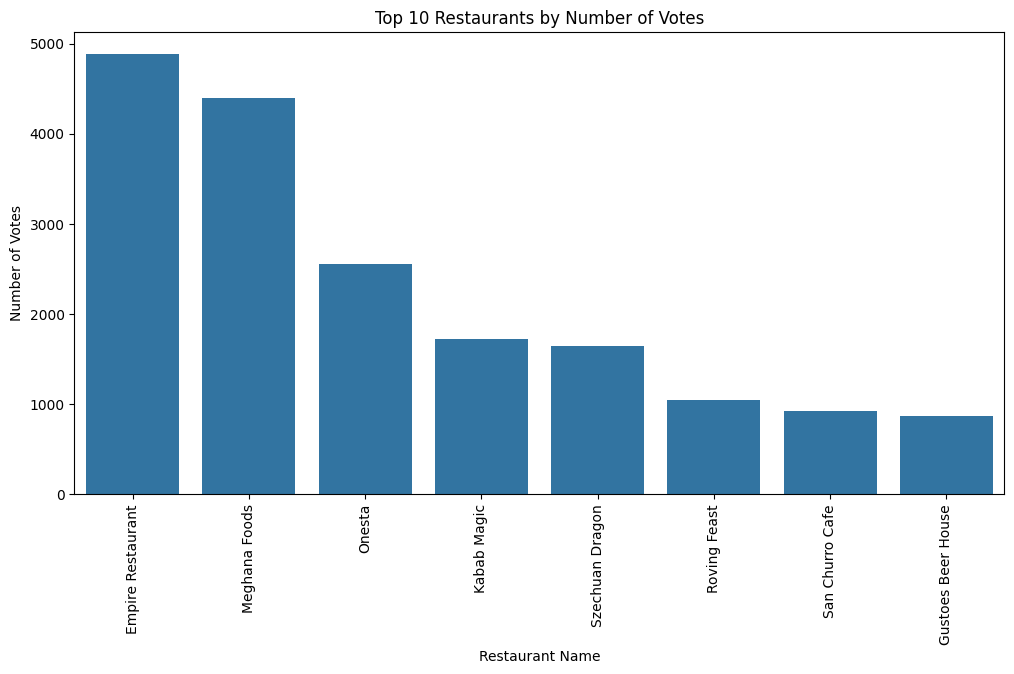

In [ ]:
top_10_by_votes = dataframe.nlargest(10, 'votes')
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='votes', data=top_10_by_votes)
plt.title('Top 10 Restaurants by Number of Votes')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90)
plt.show()

these are the top 10 restaurants by the number of votes.

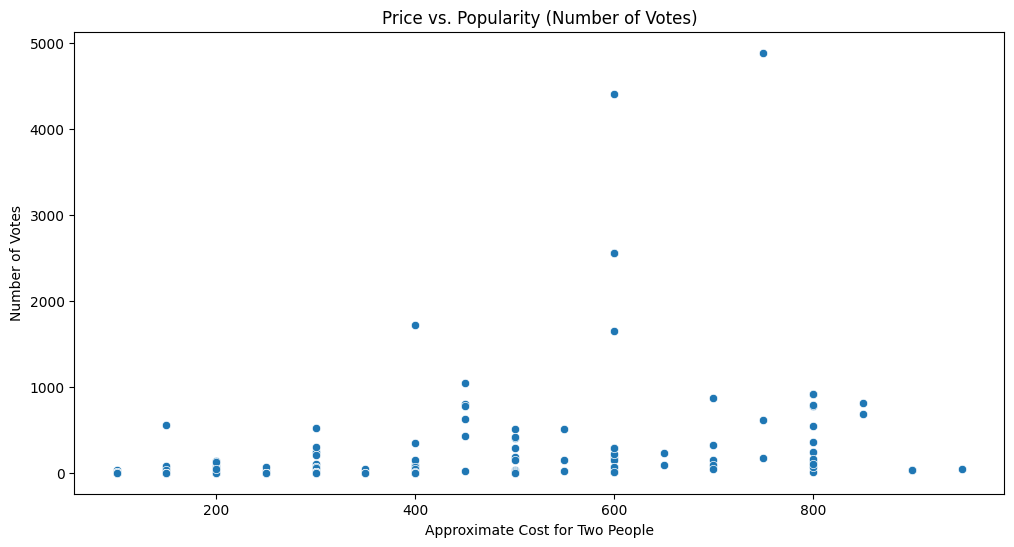

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='approx_cost(for two people)', y='votes', data=dataframe)
plt.title('Price vs. Popularity (Number of Votes)')
plt.xlabel('Approximate Cost for Two People')
plt.ylabel('Number of Votes')
plt.show()


In [ ]:
correlation = dataframe['approx_cost(for two people)'].corr(dataframe['votes'])
print(f"Correlation between price and number of votes: {correlation:.2f}")

Correlation between price and number of votes: 0.32


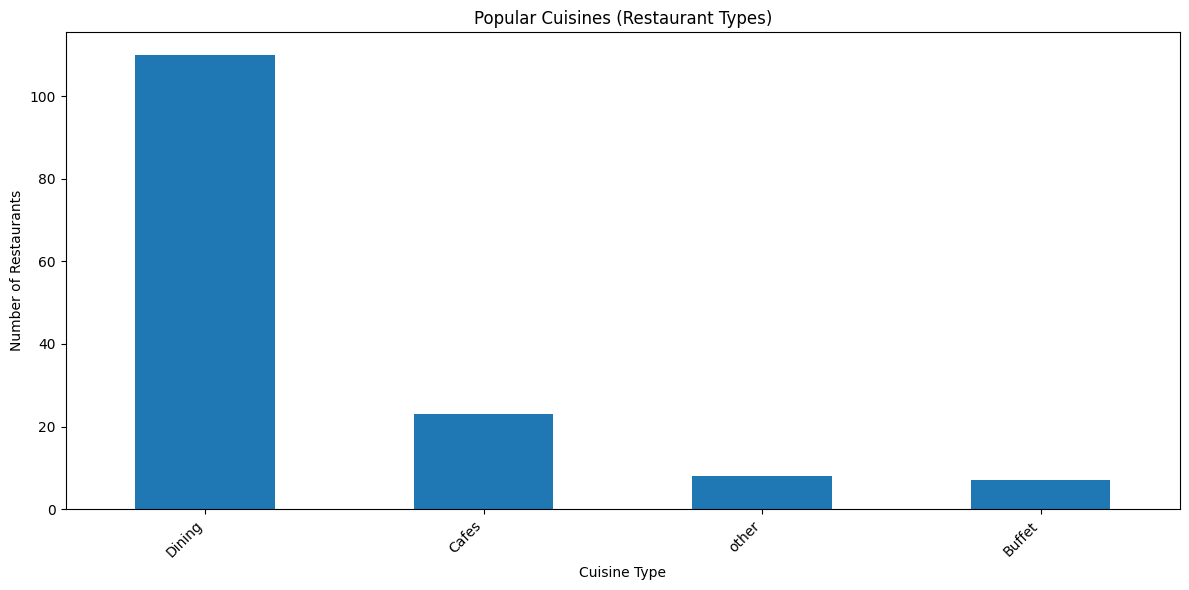

In [ ]:
# for the popular cuisines
popular_cuisines = dataframe['listed_in(type)'].value_counts()
plt.figure(figsize=(12, 6))
popular_cuisines.plot(kind='bar')
plt.title('Popular Cuisines (Restaurant Types)')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
top_5_cuisines = popular_cuisines.nlargest(5).index
cuisine_analysis = dataframe[dataframe['listed_in(type)'].isin(top_5_cuisines)].groupby('listed_in(type)').agg({
    'rate': 'mean',
    'approx_cost(for two people)': 'mean',
    'online_order': lambda x: (x == 'Yes').mean() * 100
}).round(2)

cuisine_analysis.columns = ['Avg Rating', 'Avg Cost for Two', '% Online Order']
print("\nCharacteristics of Top 5 Cuisines:")
print(cuisine_analysis)


Characteristics of Top 5 Cuisines:
                 Avg Rating  Avg Cost for Two  % Online Order
listed_in(type)                                              
Buffet                 3.84            671.43           57.14
Cafes                  3.77            545.65           65.22
Dining                 3.57            357.27           30.00
other                  3.91            668.75           75.00


The impact of table booking and its Visualization

In [ ]:
table_booking_impact = dataframe.groupby('book_table').agg({
    'rate': 'mean',
    'approx_cost(for two people)': 'mean',
    'votes': 'mean'
}).round(2)

table_booking_impact.columns = ['Avg Rating', 'Avg Cost for Two', 'Avg Votes']
print("\nTable Booking Impact:")
print(table_booking_impact)


Table Booking Impact:
            Avg Rating  Avg Cost for Two  Avg Votes
book_table                                         
No                3.60            402.50     226.19
Yes               4.19            693.75     940.75


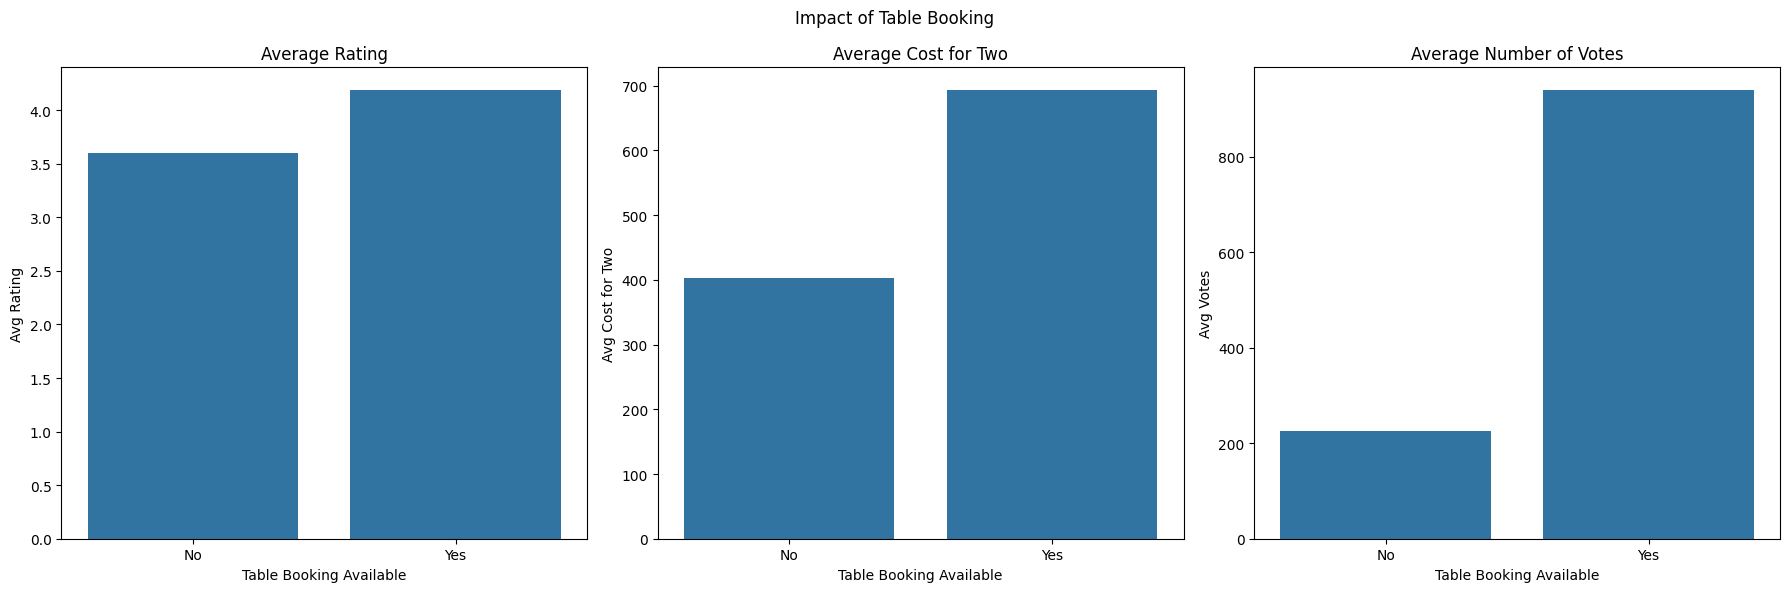

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Impact of Table Booking')

sns.barplot(x=table_booking_impact.index, y='Avg Rating', data=table_booking_impact, ax=axes[0])
axes[0].set_title('Average Rating')
axes[0].set_xlabel('Table Booking Available')

sns.barplot(x=table_booking_impact.index, y='Avg Cost for Two', data=table_booking_impact, ax=axes[1])
axes[1].set_title('Average Cost for Two')
axes[1].set_xlabel('Table Booking Available')

sns.barplot(x=table_booking_impact.index, y='Avg Votes', data=table_booking_impact, ax=axes[2])
axes[2].set_title('Average Number of Votes')
axes[2].set_xlabel('Table Booking Available')

plt.tight_layout()
plt.show()

Hence, we look at the impact of table booking with avg costs of two poeple, no of votes and average rating as factors. We can conclude that restaurants offering this service tend to be higher-rated, more expensive, and significantly more reviewed by customers.